In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000

X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state = 42)

In [ ]:
import tensorflow as tf
tf.constant(X)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])>

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


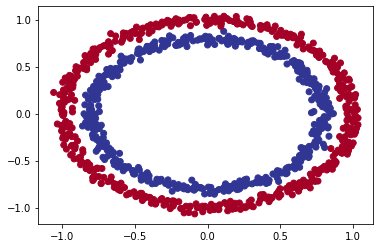

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['Accuracy'])

model.fit(X, y, epochs = 100, verbose = 0)

In [ ]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1276 - Accuracy: 1.0000


[0.12757189571857452, 1.0]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    
  else:
    print("Doing binary class classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y, cmap= plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), yy.min())
    plt.ylim(yy.min(), yy.max())

 




In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max, y_min, y_max


(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
tf.random.set_seed(42)
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]


In [ ]:
tf.random.set_seed(42)
model_80 = tf.keras.Sequential([
    
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')

])

model_80.compile(loss = tf.keras.losses.mse,
                 optimizer = tf.keras.optimizers.Adam(0.01),
                 metrics = ['mse'])


model_80.fit(tf.expand_dims(X_reg_train, axis = -1), 
             y_reg_train, epochs = 100, verbose = 0)

In [ ]:
X_reg_test.shape

TensorShape([50])

In [ ]:
# y_reg_preds = model_80.predict(X_reg_train)
# Z = tf.squeeze(y_reg_preds)

# plt.figure(figsize = (9, 7))
# plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
# plt.scatter(X_reg_test, y_reg_test, c = "g", label = "test data")
# plt.scatter(X_reg_test, Z,  c = "r", label = "Predictions")
# plt.legend();

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["accuracy"])

model_8.fit(X, y, epochs = 100, verbose = 1)


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5410
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.5760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5110
Epoch 11/

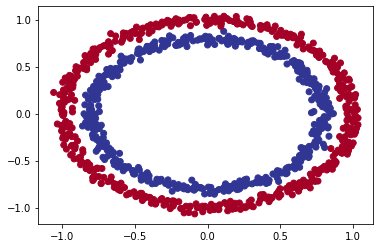

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

In [ ]:
A=tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

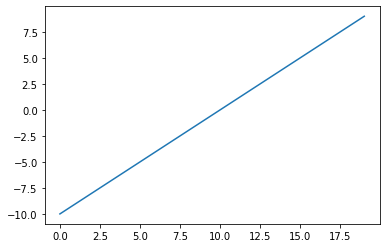

In [ ]:
plt.plot(A);

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy  = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
  
  # Converting 2d arrays into 1d 
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # making predictions
  y_pred = model.predict(x_in)

  if len(y_pred [0] > 1):
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contour(xx, yy , y_pred, cmap=plt.c.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

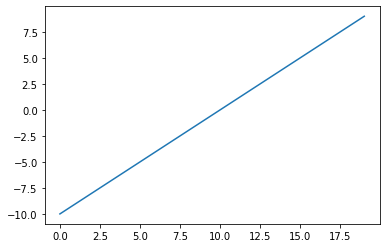

In [ ]:
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x)) 

sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

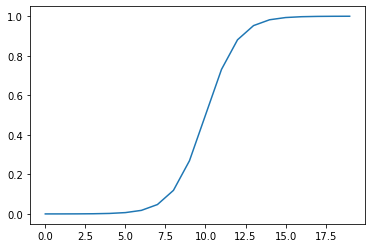

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(x, 0)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

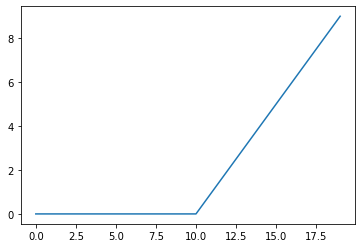

In [ ]:
plt.plot(relu(A))

In [ ]:
tf.keras.activations.linear(A)



<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

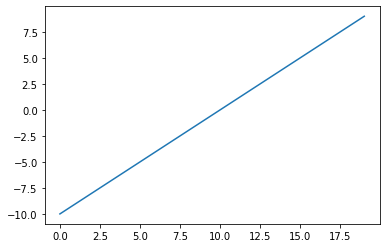

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(100, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)

])

model_sigmoid.compile(loss = tf.keras.losses.binary_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(0.01),
                  metrics = ["accuracy"])

history = model_sigmoid.fit(X_train, y_train, epochs=100, verbose = 0)

In [ ]:
model_sigmoid.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000


[0.005154971964657307, 1.0]

In [ ]:
# plot the loss (or ) training curves

In [ ]:
model_sigmoid.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               300       
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history

{'loss': [0.6906139254570007,
  0.6662911176681519,
  0.6331628561019897,
  0.5833324790000916,
  0.5351656675338745,
  0.46269145607948303,
  0.4196608066558838,
  0.36362019181251526,
  0.3083418905735016,
  0.2547967731952667,
  0.2182815670967102,
  0.18855756521224976,
  0.16504022479057312,
  0.14478245377540588,
  0.12252688407897949,
  0.10791639238595963,
  0.0946052074432373,
  0.08713481575250626,
  0.07933731377124786,
  0.07232895493507385,
  0.06578050553798676,
  0.05993399769067764,
  0.05459771305322647,
  0.0526617094874382,
  0.048944052308797836,
  0.042862605303525925,
  0.039601389318704605,
  0.03867951035499573,
  0.035770609974861145,
  0.03466621786355972,
  0.03441020846366882,
  0.03160011023283005,
  0.027878835797309875,
  0.025319088250398636,
  0.024472255259752274,
  0.023899905383586884,
  0.023164935410022736,
  0.021039631217718124,
  0.020870154723525047,
  0.0193741787225008,
  0.018531953915953636,
  0.018596643581986427,
  0.018021099269390106,
 

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.690614,0.48625
1,0.666291,0.68625
2,0.633163,0.68250
3,0.583332,0.88500
4,0.535166,0.81750
...,...,...
95,0.004996,1.00000
96,0.003983,1.00000
97,0.003737,1.00000
98,0.003762,1.00000


Text(0.5, 1.0, 'Model_sigmoid training (loss) curve')

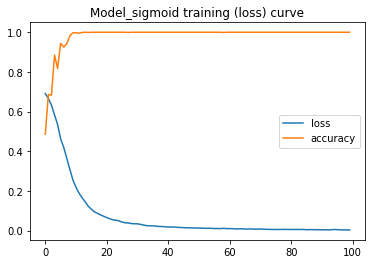

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_sigmoid training (loss) curve")

Learning rate (Call back)
model_sig2


In [ ]:
tf.random.set_seed(42)
model_sig2 = tf.keras.Sequential([
    tf.keras.layers.Dense(25, tf.keras.activations.relu),
    tf.keras.layers.Dense(20, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)

])

model_sig2.compile(loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                   metrics = ["accuracy"])

# creating a lr callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 
                                                        1e-4 *10**(epoch/20))

# fit the model
history_sig2 = model_sig2.fit(X_train, y_train, epochs = 100,
                              callbacks = [lr_scheduler])




Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4825 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - ac

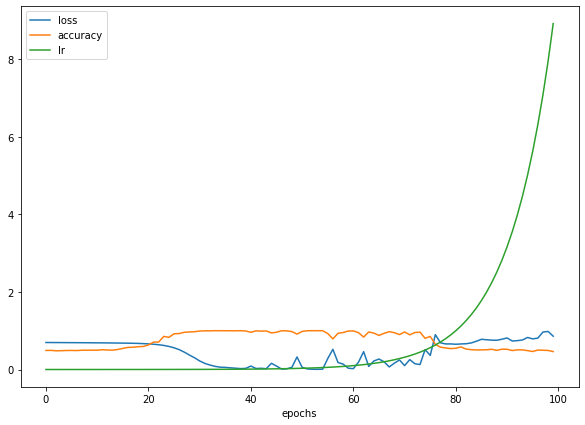

In [ ]:
pd.DataFrame(history_sig2.history).plot(figsize = (10, 7), 
                                        xlabel = "epochs")

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690614,0.48625
1,0.666291,0.68625
2,0.633163,0.68250
3,0.583332,0.88500
4,0.535166,0.81750
...,...,...
95,0.004996,1.00000
96,0.003983,1.00000
97,0.003737,1.00000
98,0.003762,1.00000


In [ ]:
# lr vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))

In [ ]:
lrs


<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'lr vs loss')

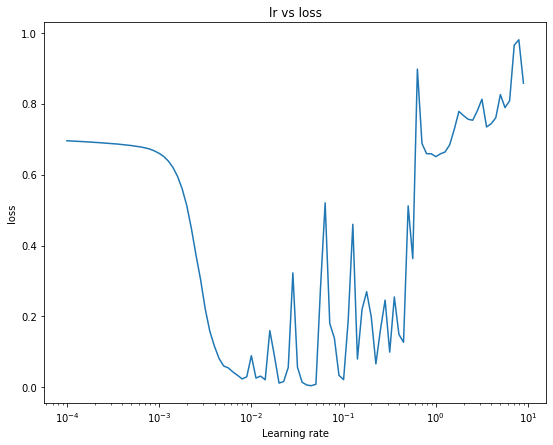

In [ ]:
plt.figure(figsize = (9, 7))
plt.semilogx(lrs, history_sig2.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("lr vs loss")

             

In [ ]:
tf.random.set_seed(42)

model_sig3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1, activation = 'sigmoid')  

])

model_sig3.compile(loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(lr=0.02),
                   metrics = ["accuracy"])

model_sig3.fit(X_train, y_train, epochs = 25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5838
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7050
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8750
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9688
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9962
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9962
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9962
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9987
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9962
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 11/25
25/25 [===========

In [ ]:
model_sig3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000


[0.0035584717988967896, 1.0]

In [ ]:
loss, accuracy = model_sig3.evaluate(X_test, y_test)
print(f"Model loss in the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000
Model loss in the test set: 0.0035584717988967896
Model accuracy on the test set: 100.00%


# Confusion matrix

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

# converting probabilities of y_preds to 1 and 0

In [ ]:
y_preds_round = tf.math.round(y_preds)

NameError: ignored

In [ ]:
y_preds_round[:10]

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model_sig3.predict(X_test)

confusion_matrix(y_test, y_preds_round)

Confusion matrix (Pretty Code)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matirx(y_true, y_pred, classes = None,
                          figsize = (10, 10), text_size = 15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape

  fig, ax = plt.subplots(figsize = figsize)

  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  
  
  if classes:
    labels = classes

  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion matrix", 
        xlabel = "predicted label",
        ylabel = "True label",
        xticks = np.arange(*n_classes),
        yticks = np.arange(*n_classes),
        yticklabels = labels,
        xticklabels = labels)



  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)

  ax.title.set_size(text_size)



  threshold = (cm.max()+cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size = 15)

In [ ]:
class_names
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### FASHION_MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels[0]

In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


In [ ]:
train_data[0].shape, train_labels[0].shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
plt.imshow(train_data[1])

In [ ]:
train_labels[7]

In [ ]:
class_names = ["T-shirt/Top", "Trouser", "PullOver", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

In [ ]:
index_of_choice = 17

plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[17]])

In [ ]:
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data[0].shape

In [ ]:
train_labels[0].shape

In [ ]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28))
])

flatten_model.output_shape


In [ ]:
28 * 28

In [ ]:
train_labels[0]

In [ ]:
train_labels[:10]

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

fashion_mnist_nish = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    # tf.keras.layers.Dense(1, activation = "softmax")
    # tf.keras.layers.Dense(4, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_nish = fashion_mnist.fit(train_data, train_labels, epochs = 10,
                            validation_data = (test_data, test_labels))


In [ ]:
tf.one_hot(train_labels[:10], depth = 10)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

fashion_mnist_dan = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_dan = fashion_mnist.fit(train_data, tf.one_hot(train_labels,
                                                   depth = 10),
                            epochs = 10,
                            validation_data = (test_data,
                                               tf.one_hot(test_labels, 
                                                          depth = 10)))


In [ ]:
fashion_mnist_dan.summary()

In [ ]:
train_data.min(), train_data.max()

# Normalizing the data

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

# neural netowork with normalized data

In [ ]:
tf.random.set_seed(42)

fashion_mnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

fashion_mnist_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy,
                           optimizer = tf.keras.optimizers.Adam(0.01),
                           metrics = ["accuracy"])

history_norm = fashion_mnist.fit(train_data_norm, train_labels,
                                 epochs = 10,
                                 validation_data = (test_data_norm, test_labels))

                                      
                                      
                                      

In [ ]:
tf.random.set_seed(42)

fashion_mnist_norm = tf.keras.Sequential([
    # flattens the data a/c to the input data.
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    # tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

fashion_mnist_norm.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                      metrics = ["accuracy"])

history_norm_mnist = fashion_mnist_norm.fit(train_data_norm, train_labels,
                                      validation_data = (test_data_norm, test_labels),
                                      epochs = 10)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history_norm_mnist.history).plot(figsize = (10, 7),
                                              xlabel = "epochs")

In [ ]:
pd.DataFrame(history_nish.history).plot(figsize = (10, 7),
                                        xlabel = "epochs")

In [ ]:
pd.DataFrame(history_dan.history).plot(figsize = (10, 7),
                                       xlabel = "epochs",
                                       title = "Non-Normalized data")

model_13 optimal model

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["accuracy"])

history_13 = model_13.fit(train_data_norm, train_labels, 
                          validation_data = (test_data_norm,
                                             test_labels),
                          epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5299 - accuracy: 0.8110 - val_loss: 0.4184 - val_accuracy: 0.8488
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3798 - accuracy: 0.8598 - val_loss: 0.4554 - val_accuracy: 0.8421
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8736 - val_loss: 0.4147 - val_accuracy: 0.8517
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3207 - accuracy: 0.8823 - val_loss: 0.3729 - val_accuracy: 0.8693
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.8874 - val_loss: 0.3570 - val_accuracy: 0.8683
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2899 - accuracy: 0.8913 - val_loss: 0.3992 - val_accuracy: 0.8501
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8964 - val_loss: 0.3481 - val_accuracy:

In [ ]:
y_probs = model_13.predict(test_data_norm) 

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.5067059e-08, 1.9568695e-06, 1.0118652e-08, 1.8331049e-07,
        3.5801127e-09, 6.6480547e-04, 2.2247983e-07, 2.7269460e-03,
        3.1739918e-07, 9.9660552e-01],
       [4.6520177e-07, 2.9270683e-18, 9.9961638e-01, 5.2967403e-10,
        3.1888002e-04, 1.3374831e-20, 6.4174339e-05, 1.1554692e-22,
        7.3652473e-11, 7.6127960e-19],
       [1.1662189e-11, 1.0000000e+00, 1.5536804e-18, 1.1089285e-10,
        1.9082567e-16, 9.7547118e-18, 1.1008707e-12, 6.0519652e-18,
        6.6477292e-12, 1.3229762e-12],
       [1.5919343e-09, 1.0000000e+00, 1.1388557e-15, 4.8220269e-08,
        8.0581023e-14, 8.7781023e-15, 9.3521781e-11, 1.9835409e-14,
        3.5293046e-11, 8.4396629e-11],
       [3.0471253e-01, 1.6610689e-07, 1.0772750e-02, 1.9631567e-03,
        1.2467117e-03, 3.1654107e-10, 6.8129426e-01, 5.0521860e-15,
        1.0446760e-05, 2.0921487e-14]], dtype=float32)

In [ ]:
y_probs[0]

array([1.1630524e-08, 1.7248822e-06, 1.4412747e-07, 7.4937248e-08,
       6.7111370e-07, 6.5565313e-04, 1.8212400e-07, 1.9338483e-03,
       6.9329991e-07, 9.9740702e-01], dtype=float32)

In [ ]:
tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

Coverted the probabilities into the integer

In [ ]:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[841,   0,   8,  33,   8,   1, 104,   0,   5,   0],
       [  3, 957,   3,  27,   8,   0,   1,   0,   0,   1],
       [ 13,   0, 774,  13, 133,   0,  67,   0,   0,   0],
       [ 17,   5,   9, 870,  67,   0,  29,   0,   3,   0],
       [  1,   0,  62,  12, 882,   0,  43,   0,   0,   0],
       [  2,   0,   0,   0,   0, 974,   1,  16,   2,   5],
       [123,   0,  67,  32, 105,   0, 670,   0,   3,   0],
       [  0,   0,   0,   0,   0,  14,   0, 969,   0,  17],
       [  7,   0,   3,   6,   7,   5,  23,   1, 948,   0],
       [  0,   0,   0,   1,   0,  14,   1,  41,   0, 943]])

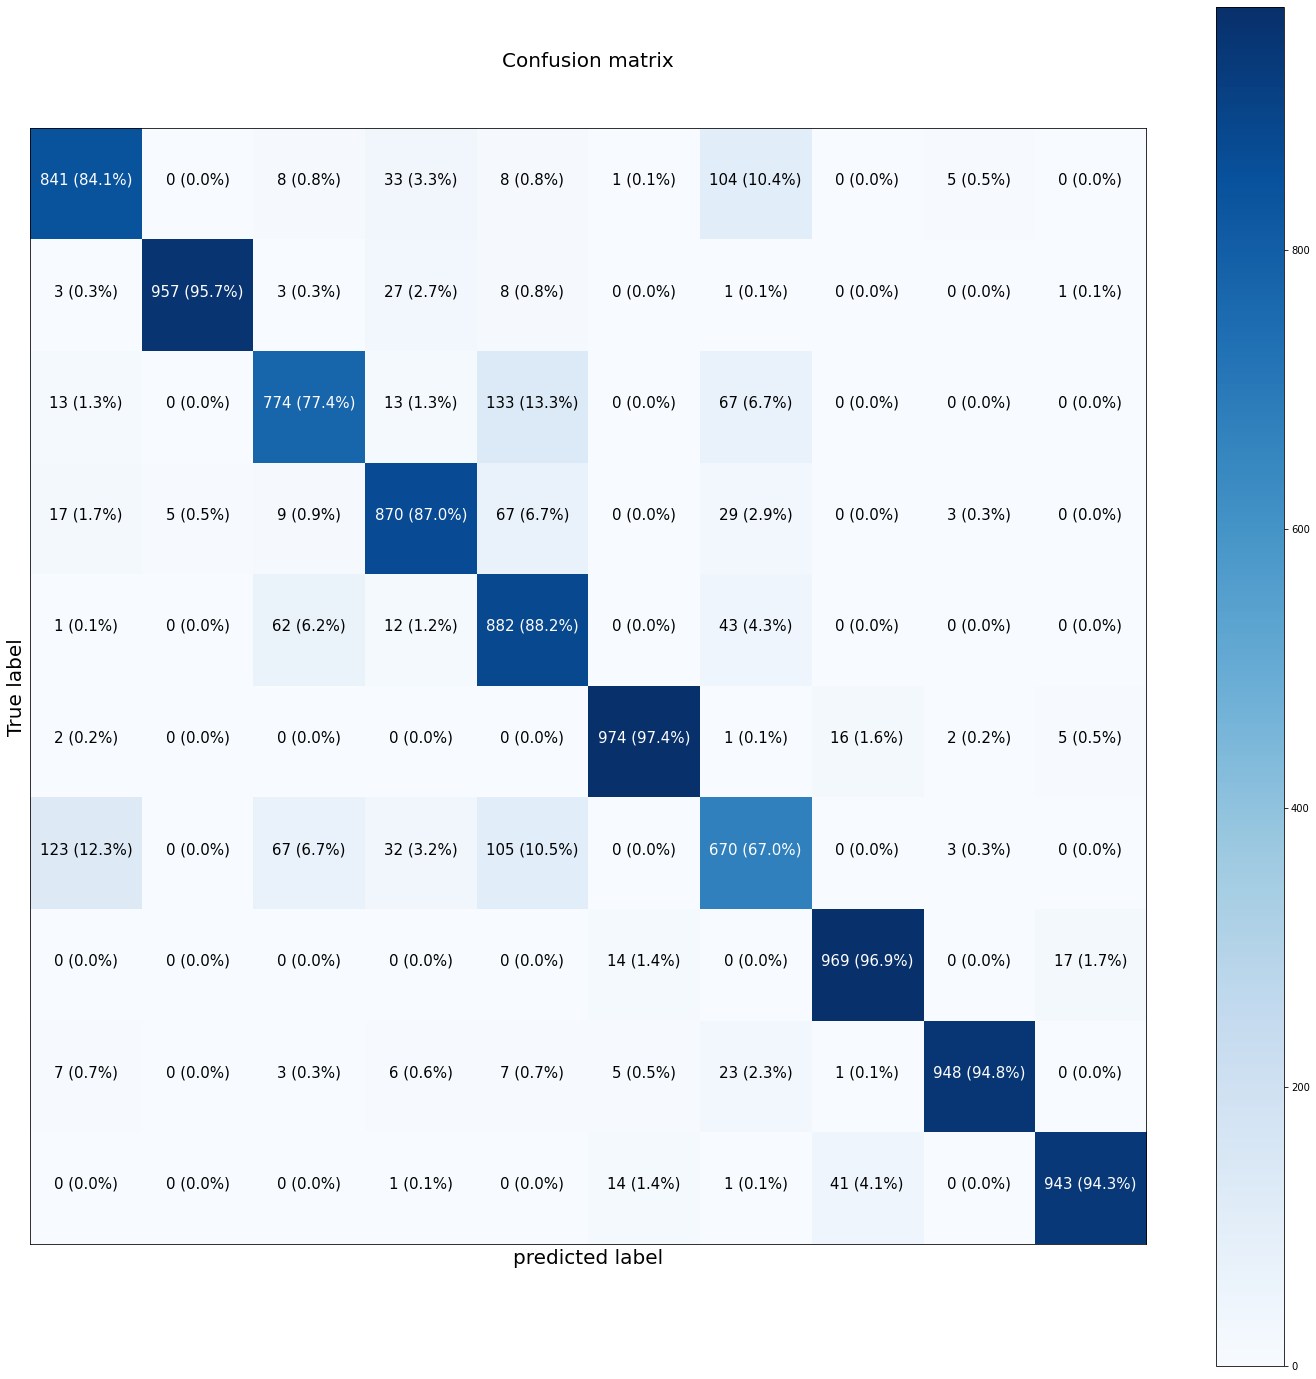

In [ ]:
make_confusion_matirx(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (25, 25),
                      text_size = 20)


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction
  and truth label.
  """
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
             color = color)

  

1/1 [==============================] - 0s 27ms/step


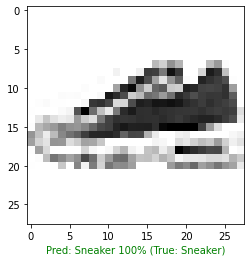

In [ ]:
plot_random_image(model = model_13,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [ ]:
model_13.layers

In [ ]:
model_13.layers[1]

In [ ]:
weights1, biases1 = model_13.layers[1].get_weights()
weights1, weights1.shape, len(weights1)

(array([[-0.00380566,  0.09735329,  0.09581392, ..., -0.06670354,
         -0.06818554, -0.23376307],
        [-0.1978749 , -0.02656884,  0.02128802, ...,  0.05363333,
          0.02099904, -0.5341587 ],
        [-0.03186668,  0.1796624 , -0.46788093, ..., -0.07979318,
          0.04273382, -0.00152353],
        ...,
        [-0.23595451,  0.24011043, -0.41836724, ...,  0.5073455 ,
          0.04357821, -0.05595737],
        [-0.30931985,  0.32916853, -0.2318009 , ...,  0.08722144,
         -0.02641106,  0.6152605 ],
        [-0.3083413 ,  0.79392403,  0.1506591 , ..., -0.26769835,
          0.0667464 ,  0.7809432 ]], dtype=float32), (784, 100), 784)

In [ ]:
biases1, biases1.shape

(array([ 0.08936293,  0.5536668 ,  0.50525206, -0.5130583 ,  0.22420739,
        -0.31419918,  0.14759749,  0.07439315,  0.6143764 ,  0.18372281,
         0.4085096 ,  0.3988484 ,  0.20490998, -0.10463258,  0.50887203,
         0.15183477, -0.03967759, -0.18800007, -0.02448494, -0.0149611 ,
        -0.26536554, -0.04630529, -0.10580732,  0.48464012,  0.19576977,
        -0.1556415 , -0.07861849,  0.720994  , -0.12154849, -0.4097982 ,
         0.12691365,  0.48256335,  0.15900321, -0.31047216,  0.6068547 ,
        -0.52234215,  0.06105183,  0.3059573 ,  0.26191515,  0.48099586,
         0.7922408 ,  0.523747  ,  0.6581971 ,  0.04293993,  0.21839681,
         0.2752286 ,  0.10625499,  0.37684834,  0.23521633, -0.04322142,
         0.2787942 ,  0.03260064, -0.04073877,  0.2924501 , -0.5046831 ,
        -1.2159028 ,  0.5787296 ,  0.12012874,  0.03403158, -0.01647303,
         0.13580477,  0.2924871 ,  0.40592122,  0.35476944, -0.03649603,
         0.19979867, -0.5988209 ,  0.18255813,  0.3

In [ ]:
model_13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-traina

In [ ]:
weights, biases = model_13.layers[5].get_weights()
weights, weights.shape, len(weights)


(array([[ 2.37451941e-01, -9.69034508e-02, -1.24123814e-02,
          2.93773293e-01,  2.54292712e-02, -2.82620966e-01,
          3.11865900e-02, -2.00439647e-01, -4.11506176e-01,
          2.61801064e-01],
        [ 3.81360561e-01, -4.37929600e-01,  3.48857194e-01,
          2.15046063e-01, -2.14826800e-02,  2.31796056e-01,
          2.66823411e-01, -3.56658489e-01, -8.56313556e-02,
         -3.58527333e-01],
        [-2.79678762e-01, -3.20152998e-01, -7.13264495e-02,
         -6.60900176e-02, -1.80007935e-01,  2.52161920e-01,
         -2.57006079e-01,  1.22715302e-01,  2.42533565e-01,
         -2.55614579e-01],
        [-3.97087842e-01, -8.20054412e-01,  2.15443894e-01,
          1.57324806e-01,  2.96054870e-01, -4.01958257e-01,
          1.98009193e-01,  7.41346627e-02, -3.00781876e-02,
          1.97039828e-01],
        [-4.32251208e-02,  5.10559022e-01, -9.59944166e-03,
          3.74794394e-01, -7.04785660e-02, -7.21345484e-01,
         -1.86346591e-01, -1.16482250e-01,  1.328311

In [ ]:
biases, biases.shape

(array([-0.0628311 , -0.09968133,  0.08717903,  0.18613562, -0.20727281,
        -0.06760226,  0.14978229, -0.07999693,  0.11232399, -0.15187639],
       dtype=float32), (10,))

In [ ]:
model_13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-traina

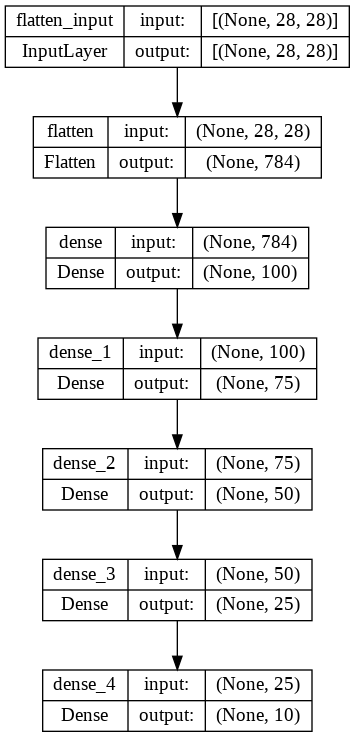

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_13, show_shapes = True)

In [ ]:
model_13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 91,410
Trainable params: 91,410
Non-traina

In [ ]:
test_labels, y_preds

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), array([9, 2, 1, ..., 8, 1, 5]))

In [ ]:
class_names

['T-shirt/Top',
 'Trouser',
 'PullOver',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history_13.history).plot(figsize = (10, 7),
                                      xlabel = "epochs",
                                      title = "loss vs accuracy")

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(75, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

history_14_lr = model_14.fit(train_data_norm, train_labels, 
                          validation_data = (test_data_norm,
                                             test_labels),
                          epochs = 40,
                          callbacks = [lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(history_14_lr.history).plot(figsize = (10, 7),
                                         xlabel = "epochs")

In [ ]:
import numpy as np
import matplotlib.pyplot as plot


lrs = 1e-3 * (10**(tf.range(40)/20))




plot.semilogx(lrs, history_14_lr.history["loss"])

